<a href="https://colab.research.google.com/github/swapanjaliVeccProject/Sign-Language-Recognition-Neural-Network/blob/main/Sign_Language_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/Angles_Images.csv')

In [3]:
df.head()

,/content/dataset5/A/m/color_12_0490.png,"[103.0968, 162.7266, 81.4778, 158.4562, 21.0144, 52.0289, 88.0187, 59.6818, 154.4293, 52.0577, 72.9958, 60.1585, 158.965, 150.1172, 51.3453, 81.7398, 59.9544, 124.8669, 146.9061, 71.3615, 81.123, 144.6147, 148.941, 22.9086, 95.3377, 110.4374]"
0,/content/dataset5/A/m/color_12_0471.png,"[140.6825, 138.6096, 82.5662, 134.6193, 49.545..."
1,/content/dataset5/A/m/color_12_0462.png,"[110.3875, 156.0532, 77.7073, 153.8643, 21.529..."
2,/content/dataset5/A/m/color_12_0078.png,"[111.6315, 161.0923, 86.5375, 166.9085, 25.583..."
3,/content/dataset5/A/m/color_12_0162.png,"[92.5972, 151.9683, 73.5278, 159.4617, 18.3568..."
4,/content/dataset5/A/m/color_12_0420.png,"[138.549, 148.9741, 85.1078, 140.7145, 57.3207..."


In [4]:
text = 'abcdefghijklmnopqrstuvwxyz'
dict_letter = {}
for x in text:
  r = ord(x) - 97
  dict_letter[x] = r
print(dict_letter)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


In [5]:
header = []
for i in range(1,27):
  s = 'angle_'+str(i)
  header.append(s)
header.append('letter_index')
print(header)

['angle_1', 'angle_2', 'angle_3', 'angle_4', 'angle_5', 'angle_6', 'angle_7', 'angle_8', 'angle_9', 'angle_10', 'angle_11', 'angle_12', 'angle_13', 'angle_14', 'angle_15', 'angle_16', 'angle_17', 'angle_18', 'angle_19', 'angle_20', 'angle_21', 'angle_22', 'angle_23', 'angle_24', 'angle_25', 'angle_26', 'letter_index']


In [6]:
path = '/content/Angles_Letter_Indexed.csv'

if os.path.exists(path):
  os.remove(path)
else:
  with open('Angles_Letter_Indexed.csv','a') as f:
    write = csv.writer(f)
    write.writerow(header)

In [7]:
for i in range(len(df)):
  angles = df.iloc[i,1]
  name = df.iloc[i,0][20]
  res = angles.strip('][').split(', ')
  for j in range(len(res)):
    res[j] = float(res[j])
  res.append(dict_letter[name])
  # final_list = [res,dict_letter[name]]
  # print(final_list)

  with open('Angles_Letter_Indexed.csv','a') as f:
    write = csv.writer(f)
    write.writerow(res)

In [8]:
df1 = pd.read_csv('/content/Angles_Letter_Indexed.csv')

In [9]:
df1.head()

,angle_1,angle_2,angle_3,angle_4,angle_5,angle_6,angle_7,angle_8,angle_9,angle_10,...,angle_18,angle_19,angle_20,angle_21,angle_22,angle_23,angle_24,angle_25,angle_26,letter_index
0,140.6825,138.6096,82.5662,134.6193,49.5453,54.1041,103.6704,70.5126,143.0883,39.2620,...,96.6114,145.5212,70.0778,72.6412,147.0387,118.6069,32.2851,117.1271,132.3477,12
1,110.3875,156.0532,77.7073,153.8643,21.5293,43.6715,90.5790,61.4209,157.0069,54.6405,...,118.7182,154.1008,70.0738,72.7123,152.7284,118.6226,25.9838,96.6642,108.5871,12
2,111.6315,161.0923,86.5375,166.9085,25.5835,60.9043,82.4694,58.3139,161.6557,54.0583,...,135.0394,150.2309,66.9002,74.4386,149.4587,144.8678,24.3774,84.6601,99.7746,12
3,92.5972,151.9683,73.5278,159.4617,18.3568,52.0441,84.1361,62.8711,162.7518,66.0300,...,128.5643,154.5459,70.1861,78.8462,151.7044,158.3340,25.9777,83.6245,103.4728,12
4,138.5490,148.9741,85.1078,140.7145,57.3207,64.9777,94.1715,64.6605,138.6787,39.0350,...,111.9879,119.2236,72.4155,101.9528,111.5911,117.1723,48.9192,104.3864,133.6194,12


In [10]:
df1['letter_index'].unique

<bound method Series.unique of 0       12
1       12
2       12
3       12
4       12
        ..
7259    24
7260    24
7261    24
7262    24
7263    24
Name: letter_index, Length: 7264, dtype: int64>

In [11]:
train, test = train_test_split(df1, test_size=0.3, random_state=78, shuffle=True)
train_data=train.iloc[:,0:26]
train_label=train.iloc[:,-1]
test_data=test.iloc[:,0:26]
test_label=test.iloc[:,-1]

In [12]:
test_out = LabelBinarizer().fit_transform(test_label)
train_out=LabelBinarizer().fit_transform(train_label)

In [13]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

In [14]:
test_data = scaler.fit_transform(test_data)

In [15]:
model=tf.keras.Sequential([
                            tf.keras.layers.Dense(80, input_dim= 26,activation='relu'),
                           tf.keras.layers.Dense(160, activation='relu'),  
                           tf.keras.layers.BatchNormalization(), #51
                          #  tf.keras.layers.Dense(400, activation='relu'),  
                          #  tf.keras.layers.Dropout(.2),
                           tf.keras.layers.Dense(256, activation='relu'),  
                           tf.keras.layers.BatchNormalization(), #66
                          #  tf.keras.layers.Dropout(.2),
                           
                           tf.keras.layers.Dense(128, activation='relu'),  
                          #  tf.keras.layers.BatchNormalization(), #69
                           tf.keras.layers.Dense(64, activation='relu'),  
                          #  tf.keras.layers.BatchNormalization(), #63
                           tf.keras.layers.Dense(24),
                           tf.keras.layers.Softmax()
])

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/20
159/159 [==============================] - 2s 4ms/step - loss: 0.8107 - accuracy: 0.7970
Epoch 2/20
159/159 [==============================] - 1s 5ms/step - loss: 0.2966 - accuracy: 0.9156
Epoch 3/20
159/159 [==============================] - 1s 7ms/step - loss: 0.2115 - accuracy: 0.9367
Epoch 4/20
159/159 [==============================] - 1s 8ms/step - loss: 0.1549 - accuracy: 0.9512
Epoch 5/20
159/159 [==============================] - 1s 8ms/step - loss: 0.1473 - accuracy: 0.9548
Epoch 6/20
159/159 [==============================] - 1s 9ms/step - loss: 0.1065 - accuracy: 0.9677
Epoch 7/20
159/159 [==============================] - 1s 8ms/step - loss: 0.1042 - accuracy: 0.9687
Epoch 8/20
159/159 [==============================] - 1s 5ms/step - loss: 0.1003 - accuracy: 0.9689
Epoch 9/20
159/159 [==============================] - 1s 6ms/step - loss: 0.0796 - accuracy: 0.9758
Epoch 10/20
159/159 [==============================] - 1s 8ms/step - loss: 0.0742 - accuracy: 0.9766

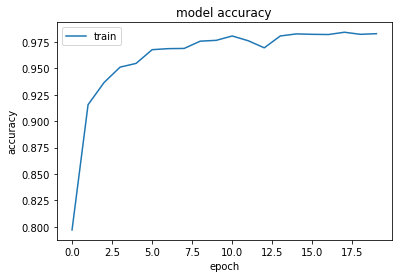

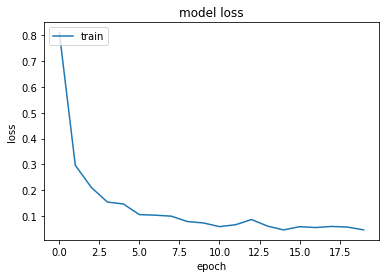

In [17]:
history = model.fit(train_data, train_out, epochs=20)

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
test=model.evaluate(test_data, test_out, verbose=1)
print('model loss : ', test[0])
print('model accuracy : ', test[1]*100, ' %')

69/69 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.9399
model loss :  0.3792682886123657
model accuracy :  93.99082660675049  %


In [19]:
prediction=model.predict(test_data)

In [20]:
test_label.iloc[12]

10

In [21]:
pred=prediction[12]

In [22]:
np.argmax(pred)

9

In [28]:
import random
ctr = 0
for i in range(0, len(test_label)):
  pos=random.randint(0, 150)
  t=test_label.iloc[pos]
  p=np.argmax(prediction[pos])
  if p > 8 :
    p = p + 1
  if t != p:
    ctr += 1
    print('test', t, 'predicted', p)

print(ctr)

test 1 predicted 2
test 21 predicted 23
test 16 predicted 3
test 16 predicted 3
test 16 predicted 14
test 16 predicted 14
test 21 predicted 23
test 11 predicted 0
test 16 predicted 3
test 1 predicted 2
test 21 predicted 23
test 16 predicted 14
test 15 predicted 3
test 15 predicted 3
test 16 predicted 14
test 11 predicted 0
test 21 predicted 23
test 11 predicted 0
test 21 predicted 23
test 1 predicted 2
test 15 predicted 3
test 11 predicted 0
test 16 predicted 3
test 21 predicted 23
test 11 predicted 0
test 16 predicted 3
test 17 predicted 3
test 15 predicted 3
test 16 predicted 14
test 17 predicted 3
test 16 predicted 14
test 16 predicted 3
test 15 predicted 3
test 15 predicted 3
test 17 predicted 3
test 1 predicted 2
test 15 predicted 3
test 17 predicted 3
test 16 predicted 14
test 1 predicted 2
test 17 predicted 3
test 11 predicted 0
test 11 predicted 0
test 11 predicted 0
test 17 predicted 3
test 15 predicted 3
test 11 predicted 0
test 15 predicted 3
test 15 predicted 3
test 11 pred

In [29]:
len(test_label)

2180

In [30]:
print(ctr/len(test_label)*100)

4.770642201834862
